<a href="https://colab.research.google.com/github/va4756/big_RaeJung/blob/main/MachineLearning_%EC%9D%B4%EC%83%81%EC%B2%A0_ML02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02_01 Artificial Neural Network(예측)

## 1.기본패키지 설치

In [1]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#  *** 런타임 다시 시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
## 1.기본
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.데이터 가져오기
import pandas as pd

## 3.데이터 전처리
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# 4. 훈련/검증용 데이터 분리
from sklearn.model_selection import train_test_split

## 5.모델구축
from sklearn.neural_network import MLPRegressor
#from sklearn.neural_network import MLPClassifier # 다층인공신경망(분류)

## 6.모델검정
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 7.최적화
from sklearn.model_selection import GridSearchCV   # 하이퍼파라미터 튜닝

In [3]:
# 한글 폰트 인식
plt.rc('font', family='NanumBarunGothic')

## 2.데이터 불러오기

### 2.1 구글 드라이버와 연결하기

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2.2 데이터 프레임으로 저장

In [5]:
housing_df = pd.read_csv('/content/주택가격.csv', encoding='cp949')
housing_df.head()

,id,가격,연면적,품질,상태,건축년도,리모델링년도,지하면적,차고면적,면적_1층,면적_2층,주거유형,판매유형,판매조건
0,1,208500,8450,7,5,2003,2003,856,548,856,854,1,1,1
1,2,181500,9600,6,8,1976,1976,1262,460,1262,0,1,1,1
2,3,223500,11250,7,5,2001,2002,920,608,920,866,1,1,1
3,4,140000,9550,7,5,1915,1970,756,642,961,756,1,1,2
4,5,250000,14260,8,5,2000,2000,1145,836,1145,1053,1,1,1


### 2.3 자료구조 살펴보기

## 3.데이터 전처리

In [6]:
housing_df.shape

(1180, 14)

In [7]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      1180 non-null   int64
 1   가격      1180 non-null   int64
 2   연면적     1180 non-null   int64
 3   품질      1180 non-null   int64
 4   상태      1180 non-null   int64
 5   건축년도    1180 non-null   int64
 6   리모델링년도  1180 non-null   int64
 7   지하면적    1180 non-null   int64
 8   차고면적    1180 non-null   int64
 9   면적_1층   1180 non-null   int64
 10  면적_2층   1180 non-null   int64
 11  주거유형    1180 non-null   int64
 12  판매유형    1180 non-null   int64
 13  판매조건    1180 non-null   int64
dtypes: int64(14)
memory usage: 129.2 KB


In [8]:
housing_df.columns

Index(['id', '가격', '연면적', '품질', '상태', '건축년도', '리모델링년도', '지하면적', '차고면적',
       '면적_1층', '면적_2층', '주거유형', '판매유형', '판매조건'],
      dtype='object')

### 3.1 필요없는 변수 제거

In [9]:
housing_df = housing_df.drop(['id'], axis=1)
housing_df.head()

,가격,연면적,품질,상태,건축년도,리모델링년도,지하면적,차고면적,면적_1층,면적_2층,주거유형,판매유형,판매조건
0,208500,8450,7,5,2003,2003,856,548,856,854,1,1,1
1,181500,9600,6,8,1976,1976,1262,460,1262,0,1,1,1
2,223500,11250,7,5,2001,2002,920,608,920,866,1,1,1
3,140000,9550,7,5,1915,1970,756,642,961,756,1,1,2
4,250000,14260,8,5,2000,2000,1145,836,1145,1053,1,1,1


### 3.2 범주형 변수 처리
- 가변수 처리시 문자로 처리해야 변수명 구분이 쉬움

In [10]:
housing_df['주거유형'] = housing_df['주거유형'].replace([1,2,3,4,5], ['단독주택','2가구변경','듀플렉스','타운젠트바깥쪽','타운젠트안쪽'])
housing_df['판매유형'] = housing_df['판매유형'].replace([1,2], ['보증증서','법원관리증서'])
housing_df['판매조건'] = housing_df['판매조건'].replace([1,2], ['정상판매','압류및공매도'])
housing_df.head()

,가격,연면적,품질,상태,건축년도,리모델링년도,지하면적,차고면적,면적_1층,면적_2층,주거유형,판매유형,판매조건
0,208500,8450,7,5,2003,2003,856,548,856,854,단독주택,보증증서,정상판매
1,181500,9600,6,8,1976,1976,1262,460,1262,0,단독주택,보증증서,정상판매
2,223500,11250,7,5,2001,2002,920,608,920,866,단독주택,보증증서,정상판매
3,140000,9550,7,5,1915,1970,756,642,961,756,단독주택,보증증서,압류및공매도
4,250000,14260,8,5,2000,2000,1145,836,1145,1053,단독주택,보증증서,정상판매


## 4.데이터 탐색

### 4.1 EDA 데이터 탐색

In [11]:
# 수치형 변수
housing_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
가격,1180.0,162496.03,52794.56,34900.0,127000.00,153537.5,191000.00,335000.0
연면적,1180.0,9185.11,3335.75,1300.0,7262.75,9143.0,11040.00,20781.0
품질,1180.0,5.86,1.21,1.0,5.00,6.0,7.00,9.0
상태,1180.0,5.66,1.14,1.0,5.00,5.0,6.00,9.0
건축년도,1180.0,1967.46,29.36,1872.0,1950.00,1969.0,1995.00,2009.0
리모델링년도,1180.0,1982.33,20.42,1950.0,1964.00,1988.0,2002.00,2010.0
지하면적,1180.0,989.73,366.31,0.0,780.00,944.0,1192.25,3206.0
차고면적,1180.0,439.83,189.13,0.0,308.00,456.0,550.00,1043.0
면적_1층,1180.0,1099.72,328.27,334.0,864.00,1040.0,1288.75,2898.0
면적_2층,1180.0,329.04,407.93,0.0,0.00,0.0,711.25,1818.0


In [12]:
# 범주형 변수
categorical_features = ['주거유형', '판매유형', '판매조건']

for col in categorical_features:
    cat = housing_df[col].value_counts()
    print(cat)

주거유형
단독주택       988
타운젠트바깥쪽     90
타운젠트안쪽      41
듀플렉스        37
2가구변경       24
Name: count, dtype: int64
판매유형
보증증서      1139
법원관리증서      41
Name: count, dtype: int64
판매조건
정상판매      1090
압류및공매도      90
Name: count, dtype: int64


### 4.2 그래프 그리기

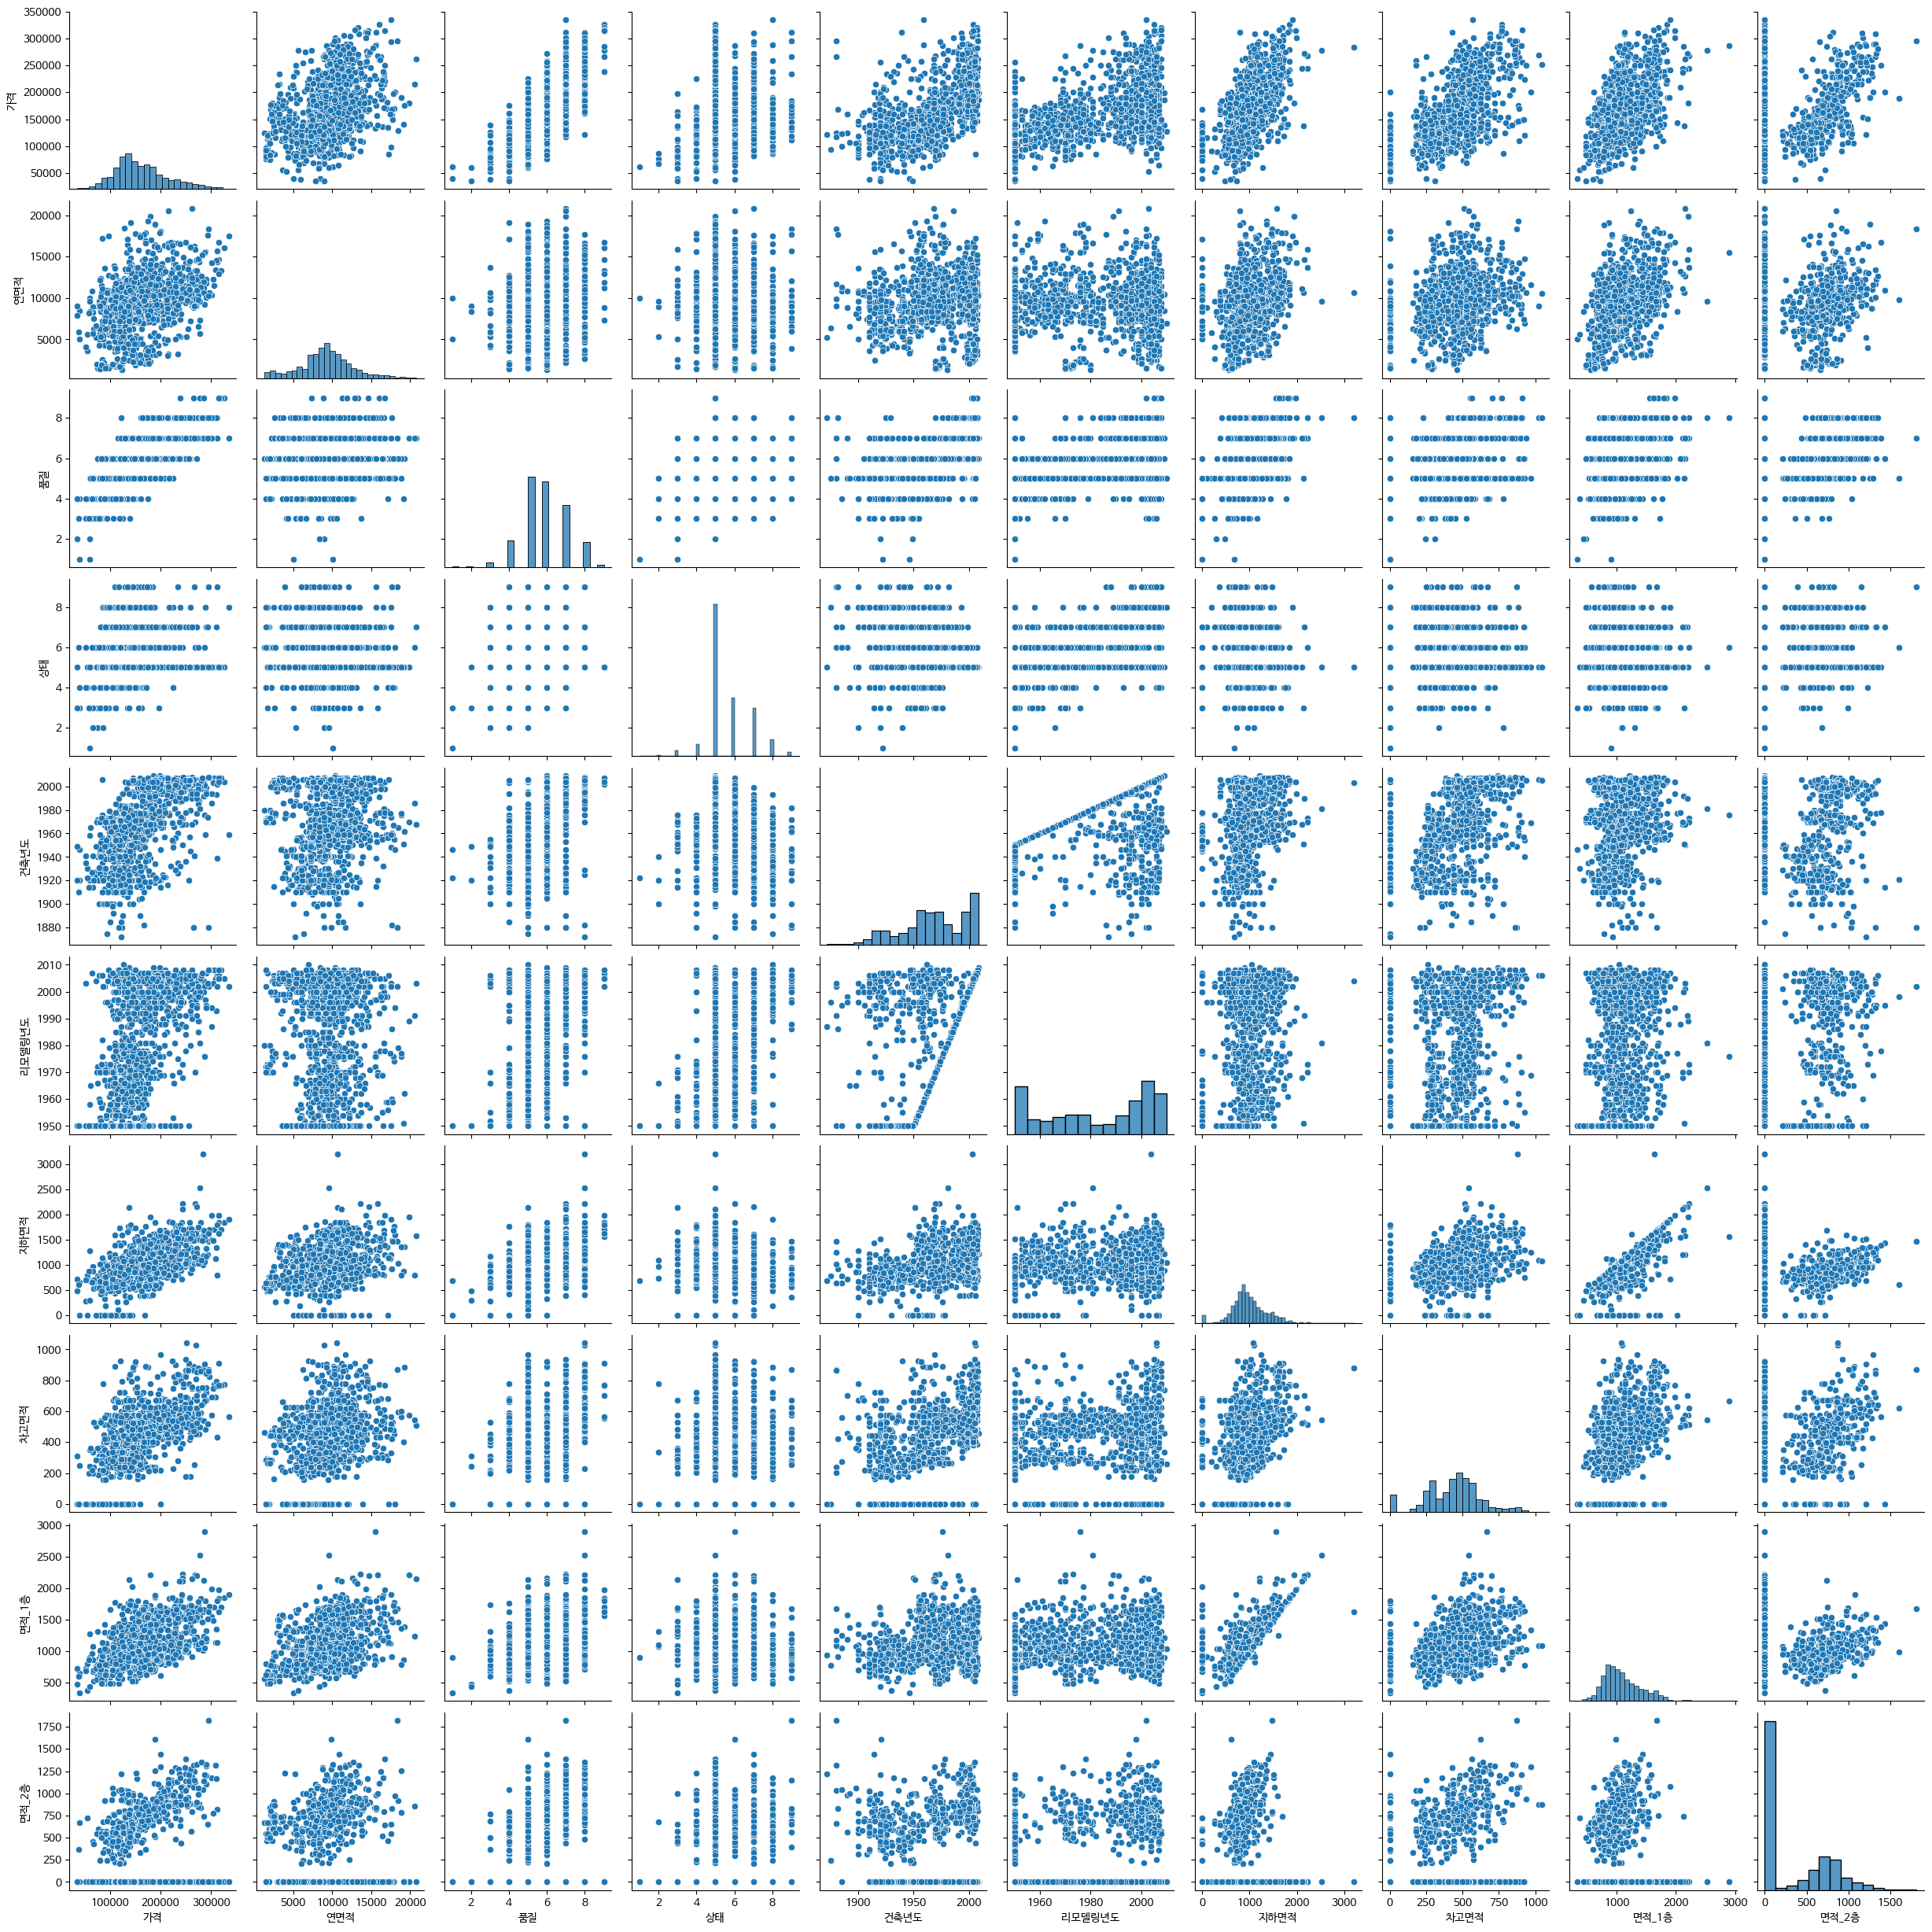

In [13]:
# 수치형 변수
g = sns.pairplot(housing_df)

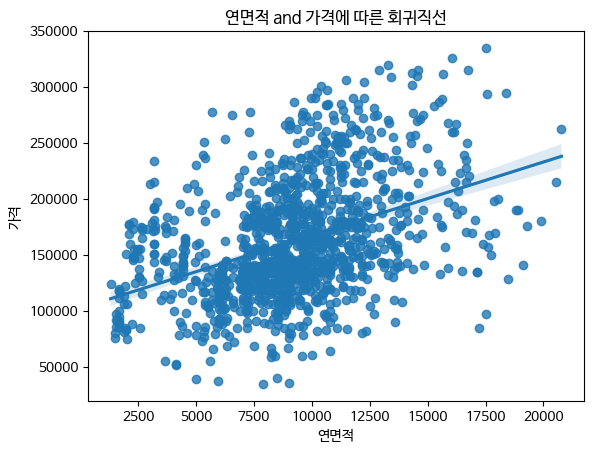

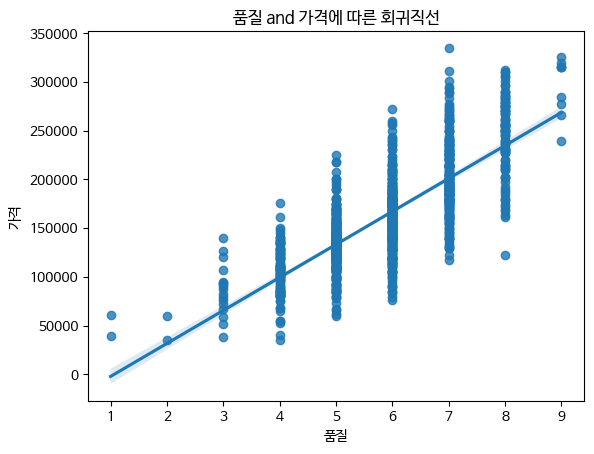

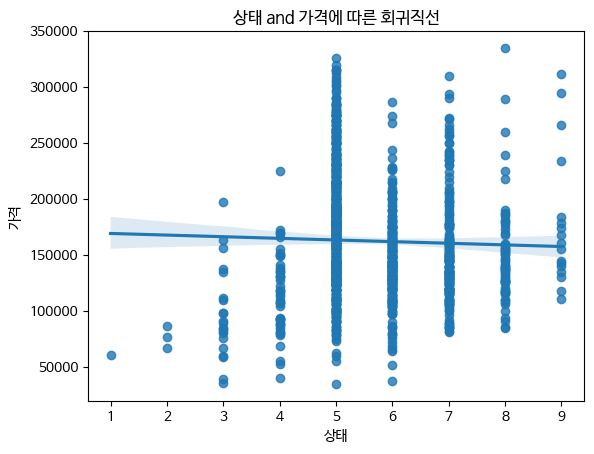

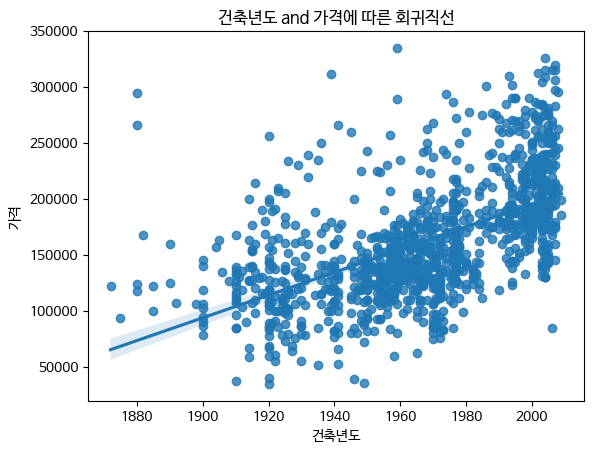

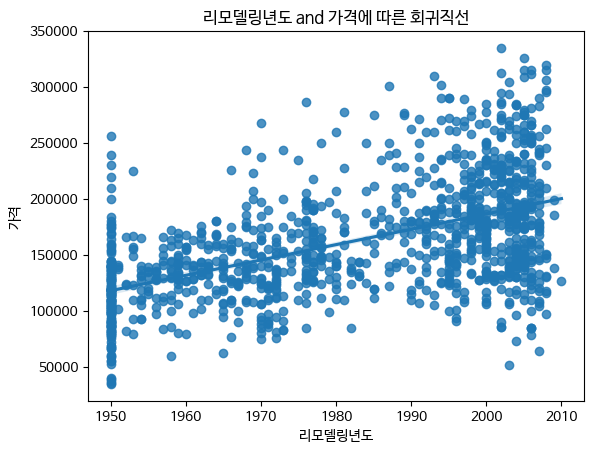

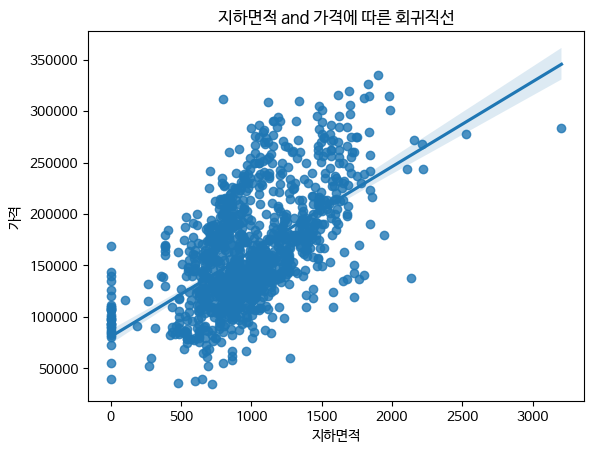

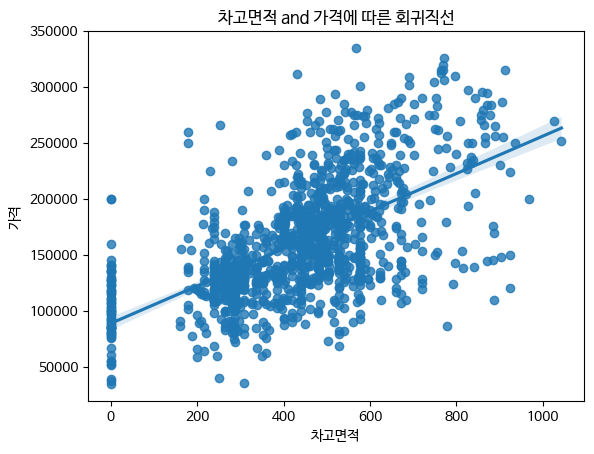

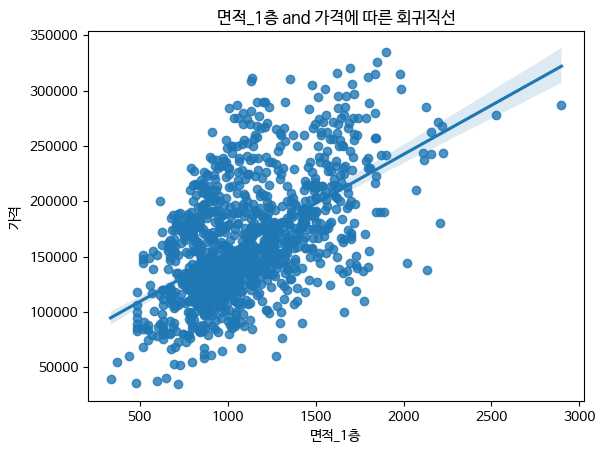

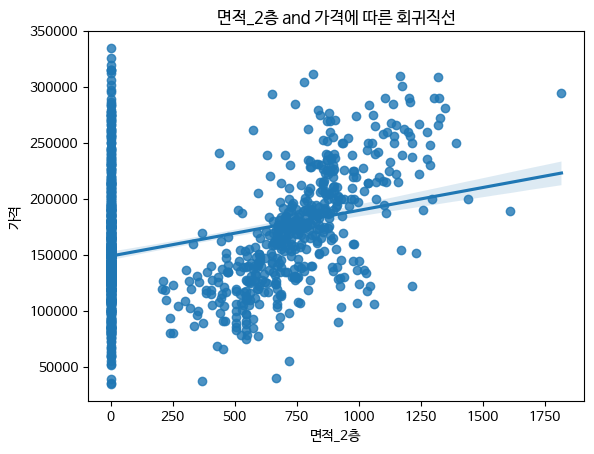

In [14]:
# 변수별 선형회귀직선
variables = ['연면적', '품질', '상태', '건축년도', '리모델링년도', '지하면적',
             '차고면적', '면적_1층', '면적_2층']

for var in variables:
    plt.figure()
    sns.regplot(x=var, y='가격', data=housing_df).set(title=f'{var} and 가격에 따른 회귀직선')

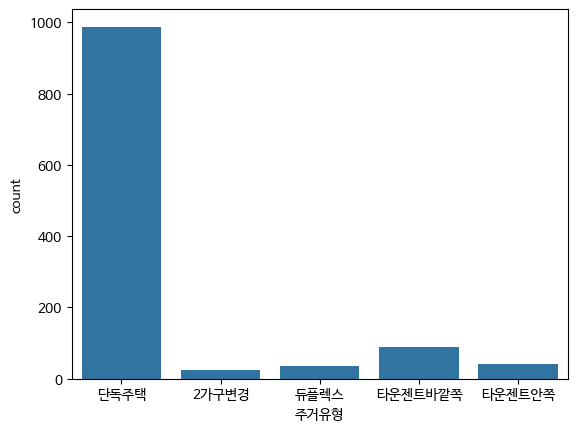

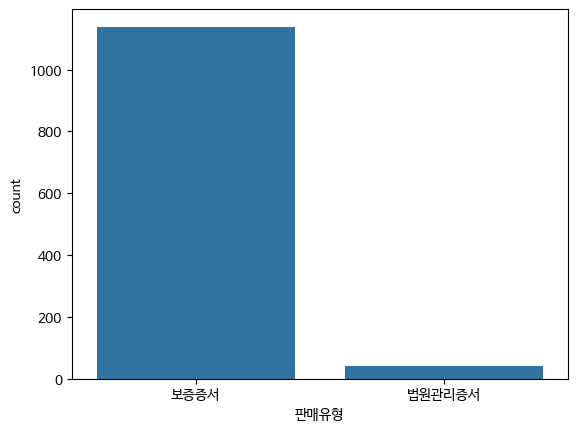

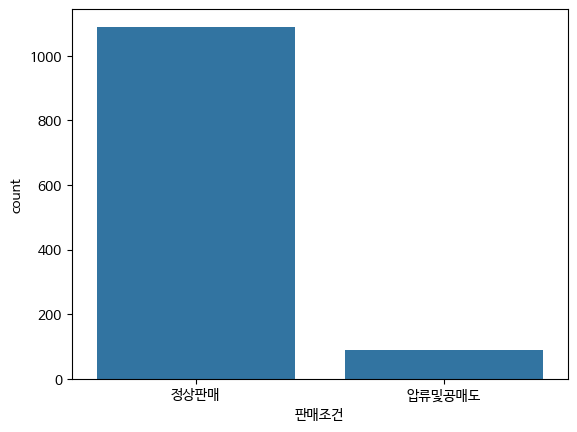

In [15]:
# 범주형 변수
for col in categorical_features:
    sns.countplot(x=col, data=housing_df)
    plt.show()

### 4.3 base accuracy

In [16]:
# base accuracy
housing_df['가격'].mean()

np.float64(162496.02881355933)

## 5.훈련/테스트용 데이터 분할

In [17]:
X = housing_df.drop(['가격'], axis=1)
X.head()

,연면적,품질,상태,건축년도,리모델링년도,지하면적,차고면적,면적_1층,면적_2층,주거유형,판매유형,판매조건
0,8450,7,5,2003,2003,856,548,856,854,단독주택,보증증서,정상판매
1,9600,6,8,1976,1976,1262,460,1262,0,단독주택,보증증서,정상판매
2,11250,7,5,2001,2002,920,608,920,866,단독주택,보증증서,정상판매
3,9550,7,5,1915,1970,756,642,961,756,단독주택,보증증서,압류및공매도
4,14260,8,5,2000,2000,1145,836,1145,1053,단독주택,보증증서,정상판매


### 5.1 data와 target으로 분리
- data: X, target:y 로 분리
- X 추출

In [18]:
y = housing_df['가격']
y.head()

,가격
0,208500
1,181500
2,223500
3,140000
4,250000


- target(y) 추출
- y 값을 series 에서 배열로 변환

In [19]:
y = np.array(y)
y = StandardScaler().fit_transform(y[:, np.newaxis]).flatten()
y

array([ 0.87174655,  0.3601134 ,  1.15598719, ...,  1.97081036,
       -0.38601829, -0.28416539])

### 5.2 훈련용 및 테스트용 데이터 분할
- stratify:y(클래스)의 비율에 따라 분할(분류모형일 때 사용)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((826, 12), (354, 12), (826,), (354,))

In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 826 entries, 462 to 1122
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연면적     826 non-null    int64 
 1   품질      826 non-null    int64 
 2   상태      826 non-null    int64 
 3   건축년도    826 non-null    int64 
 4   리모델링년도  826 non-null    int64 
 5   지하면적    826 non-null    int64 
 6   차고면적    826 non-null    int64 
 7   면적_1층   826 non-null    int64 
 8   면적_2층   826 non-null    int64 
 9   주거유형    826 non-null    object
 10  판매유형    826 non-null    object
 11  판매조건    826 non-null    object
dtypes: int64(9), object(3)
memory usage: 83.9+ KB


In [23]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354 entries, 150 to 733
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연면적     354 non-null    int64 
 1   품질      354 non-null    int64 
 2   상태      354 non-null    int64 
 3   건축년도    354 non-null    int64 
 4   리모델링년도  354 non-null    int64 
 5   지하면적    354 non-null    int64 
 6   차고면적    354 non-null    int64 
 7   면적_1층   354 non-null    int64 
 8   면적_2층   354 non-null    int64 
 9   주거유형    354 non-null    object
 10  판매유형    354 non-null    object
 11  판매조건    354 non-null    object
dtypes: int64(9), object(3)
memory usage: 36.0+ KB


## 6.pipeline으로 데이터 전처리
- 범주형 변수: OneHotEncoder
-수치형 변수
- 선형모델은 StandardScaler로 표준화
- tree형 모델은 데이터 원형 사용

### 6.1 preprocess 세팅

In [24]:
# pipeline으로 세팅
# 수치형 변수(y는 제외)
numeric_features = ['연면적', '품질', '상태', '건축년도', '리모델링년도',
                    '지하면적', '차고면적', '면적_1층', '면적_2층']

numeric_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='mean')),
        ('encoder', StandardScaler())
    ]
)

# 범주형 변수(y는 제외)
categorical_features = ['주거유형', '판매유형', '판매조건']

categorical_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='constant',
                                  fill_value='missing')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]
)

# preprocessor로 데이터 변환 세팅
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [25]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('encoder',
                                                  StandardScaler())]),
                                 ['연면적', '품질', '상태', '건축년도', '리모델링년도', '지하면적',
                                  '차고면적', '면적_1층', '면적_2층']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['주거유형', '판매유형', '판매조건'])])

### 6.2 데이터 전처리 결과 확인

In [26]:
pd.DataFrame(preprocessor.fit_transform(X_train)).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.812739,0.116531,-0.598645,0.774309,0.360570,-0.447575,-2.258360,-0.832956,-0.810388,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.186843,0.116531,0.306998,-0.312544,-1.231576,1.298673,-0.695192,1.058657,-0.810388,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.935640,0.116531,1.212641,-1.399398,1.057134,-0.257887,-1.323575,-0.567042,-0.810388,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-0.935640,-0.706155,-0.598645,-1.399398,-1.629613,0.088016,-2.258360,-0.252780,-0.810388,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.321541,0.116531,-0.598645,0.706381,0.310815,1.351674,0.857591,1.261114,-0.810388,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## 7.모델 만들기(모델설정)
- 예측모델: 00_reg
- 분류모델: 00_clf

### 7.1 pipeline으로 모델 연결

In [27]:
mlp_pipe = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('mlp_reg', MLPRegressor())
    ]
)

In [28]:
mlp_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('encoder',
                                                                   StandardScaler())]),
                                                  ['연면적', '품질', '상태', '건축년도',
                                                   '리모델링년도', '지하면적', '차고면적',
                                                   '면적_1층', '면적_2층']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['주거유형', '판매유형', '판매조건'])])),
                ('mlp_reg', MLPRegressor())])

### 7.2 하이퍼 파라미터 세팅
- 그리드 서치를 사용한 머신러닝 모델 세부 튜닝
- 기계학습 모델의 성능을 결정하는 하이퍼파라미터 튜닝

In [29]:
mlp_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'preprocessor', 'mlp_reg', 'preprocessor__force_int_remainder_cols', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__num', 'preprocessor__cat', 'preprocessor__num__memory', 'preprocessor__num__steps', 'preprocessor__num__transform_input', 'preprocessor__num__verbose', 'preprocessor__num__imputer', 'preprocessor__num__encoder', 'preprocessor__num__imputer__add_indicator', 'preprocessor__num__imputer__copy', 'preprocessor__num__imputer__fill_value', 'preprocessor__num__imputer__keep_empty_features', 'preprocessor__num__imputer__missing_values', 'preprocessor__num__imputer__strategy', 'preprocessor__num__encoder__copy', 'preprocessor__num__encoder__with_mean', 'preprocessor__num__encoder__with_std', 'preprocessor__cat__memory', 'preprocessor__cat

In [30]:
# 예측모델의 hidden layer는 500개 이상, 2 tier가 필요
# 더 많은 파라미터로 연습해 보기
mlp_grid = {
    'mlp_reg__hidden_layer_sizes': [(5,5), (5,10), (10,5), (10,10)],
    'mlp_reg__alpha': np.logspace(-5, -3, 3)
}

In [31]:
mlp_grid

{'mlp_reg__hidden_layer_sizes': [(5, 5), (5, 10), (10, 5), (10, 10)],
 'mlp_reg__alpha': array([1.e-05, 1.e-04, 1.e-03])}

### 7.3 하이퍼파라미터 그리드 만들기

In [32]:
mlp_gs = GridSearchCV(estimator=mlp_pipe,
                      param_grid=mlp_grid,
                      scoring='r2',
                      cv=5,
                      n_jobs=-1,
                      verbose=10,
                      return_train_score=True)
mlp_gs

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('encoder',
                                                                                          StandardScaler())]),
                                                                         ['연면적',
                                                                          '품질',
                                                                          '상태',
                                                                          '건축년도',
                                                                          '리모델링년도',
                                                                          '지하면적',
                                                                          '차고면적',
                                                                          '면적_1층',
                                                                          '면적_2층']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['주거유형',
                                                                          '판매유형',
                                                                          '판매조건'])])),
                                       ('mlp_reg', MLPRegressor())]),
             n_jobs=-1,
             param_grid={'mlp_reg__alpha': array([1.e-05, 1.e-04, 1.e-03]),
                         'mlp_reg__hidden_layer_sizes': [(5, 5), (5, 10),
                                                         (10, 5), (10, 10)]},
             return_train_score=True, scoring='r2', verbose=10)

## 8.모델 훈련(모델학습)

### 8.1 모델 훈련하기(learning)

In [33]:
mlp_gs.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('encoder',
                                                                                          StandardScaler())]),
                                                                         ['연면적',
                                                                          '품질',
                                                                          '상태',
                                                                          '건축년도',
                                                                          '리모델링년도',
                                                                          '지하면적',
                                                                          '차고면적',
                                                                          '면적_1층',
                                                                          '면적_2층']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['주거유형',
                                                                          '판매유형',
                                                                          '판매조건'])])),
                                       ('mlp_reg', MLPRegressor())]),
             n_jobs=-1,
             param_grid={'mlp_reg__alpha': array([1.e-05, 1.e-04, 1.e-03]),
                         'mlp_reg__hidden_layer_sizes': [(5, 5), (5, 10),
                                                         (10, 5), (10, 10)]},
             return_train_score=True, scoring='r2', verbose=10)

### 8.2 검증 곡선으로 Tuning 결과 확인

In [34]:
# 결과확인
mlp_gs.cv_results_

{'mean_fit_time': array([0.5706974 , 0.63902416, 0.65149689, 0.6567945 , 0.66925559,
        1.04490952, 1.00638561, 1.01655865, 1.11468577, 1.38280764,
        2.04557738, 1.59963636]),
 'std_fit_time': array([0.06560162, 0.02426225, 0.01795927, 0.01233764, 0.11997917,
        0.06921018, 0.10211865, 0.27988049, 0.1991652 , 0.2451139 ,
        0.37542965, 0.21012667]),
 'mean_score_time': array([0.01635313, 0.01483455, 0.01455464, 0.01395679, 0.02461295,
        0.02707968, 0.02434235, 0.03898516, 0.02472949, 0.03741789,
        0.04236226, 0.02690344]),
 'std_score_time': array([0.00088298, 0.00192225, 0.00047936, 0.00029449, 0.00826194,
        0.00824835, 0.00864449, 0.02389395, 0.00895622, 0.01152187,
        0.01978164, 0.00866203]),
 'param_mlp_reg__alpha': masked_array(data=[1e-05, 1e-05, 1e-05, 1e-05, 0.0001, 0.0001, 0.0001,
                    0.0001, 0.001, 0.001, 0.001, 0.001],
              mask=[False, False, False, False, False, False, False, False,
                    F

In [35]:
# 분석결과를 표로 정리
result_df = pd.DataFrame(mlp_gs.cv_results_)
result_df = result_df.sort_values(by=['rank_test_score'])
result_df[['params', 'rank_test_score', 'mean_test_score', 'std_test_score']]

,params,rank_test_score,mean_test_score,std_test_score
2,"{'mlp_reg__alpha': 1e-05, 'mlp_reg__hidden_lay...",1,0.872320,0.020765
11,"{'mlp_reg__alpha': 0.001, 'mlp_reg__hidden_lay...",2,0.870874,0.018741
10,"{'mlp_reg__alpha': 0.001, 'mlp_reg__hidden_lay...",3,0.868856,0.023253
8,"{'mlp_reg__alpha': 0.001, 'mlp_reg__hidden_lay...",4,0.863764,0.008148
9,"{'mlp_reg__alpha': 0.001, 'mlp_reg__hidden_lay...",5,0.863289,0.032879
7,"{'mlp_reg__alpha': 0.0001, 'mlp_reg__hidden_la...",6,0.863086,0.012552
3,"{'mlp_reg__alpha': 1e-05, 'mlp_reg__hidden_lay...",7,0.861813,0.017410
1,"{'mlp_reg__alpha': 1e-05, 'mlp_reg__hidden_lay...",8,0.860928,0.021860
0,"{'mlp_reg__alpha': 1e-05, 'mlp_reg__hidden_lay...",9,0.855365,0.014787
5,"{'mlp_reg__alpha': 0.0001, 'mlp_reg__hidden_la...",10,0.854340,0.017311


In [36]:
# 튜닝결과 그래프
# 파라미터값이 ( , )로 되어 있어서 그래프로 구현 못함

### 8.3 best 모델 설정

In [37]:
# best 모델 파라미터 확인
print(mlp_gs.best_score_)
print(mlp_gs.best_params_)

0.8723196015919413
{'mlp_reg__alpha': np.float64(1e-05), 'mlp_reg__hidden_layer_sizes': (10, 5)}


In [38]:
# best 모델 파라미터를 최종모델로 훈련
best_reg = mlp_gs.best_estimator_
best_reg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('encoder',
                                                                   StandardScaler())]),
                                                  ['연면적', '품질', '상태', '건축년도',
                                                   '리모델링년도', '지하면적', '차고면적',
                                                   '면적_1층', '면적_2층']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['주거유형', '판매유형', '판매조건'])])),
                ('mlp_reg',
                 MLPRegressor(alpha=np.float64(1e-05),
                              hidden_layer_sizes=(10, 5)))])

In [40]:
best_reg['mlp_reg']

MLPRegressor(alpha=np.float64(1e-05), hidden_layer_sizes=(10, 5))

## 9.모델 test 및 검정

### 9.1 검증용 데이터 예측
- predict(class 로 표시)
- predict_proba(확률값으로 표시): 분류모델에서 사용

In [41]:
y_pred = best_reg.predict(X_test)
y_pred

array([ 1.56202831, -0.17372026, -0.84922361, -0.4707995 ,  0.5611439 ,
       -0.44745521,  0.56833019, -0.88967624,  2.26005623, -1.62480196,
        0.03921404, -0.33558604, -1.0977503 ,  0.56912529,  0.72325919,
       -0.26294261, -0.21323865, -0.70449188, -0.50706549,  0.32255653,
        1.49240853, -0.79160962, -0.86918263, -0.26061356,  1.73647178,
        0.28342366, -0.44156456, -0.31712488, -1.2350777 , -0.78876764,
        1.00330228,  0.41948361,  0.89102965, -1.21485723,  0.45391571,
       -0.47501021, -0.52664267, -1.30324143, -0.53831151,  0.61786548,
       -0.16503224,  0.00616476, -0.55282788, -0.20859231, -2.10609689,
        1.35489698, -0.35563001,  1.93582651,  0.46106365,  0.9780737 ,
       -0.65562845, -0.47837163,  0.43858999, -0.14359362,  0.81387542,
       -0.42366327, -0.54486358, -0.46088536,  0.04446892, -1.25739712,
       -0.13837353, -1.30046676,  0.65425094, -0.36850398,  0.95192242,
        0.17259856,  0.9949556 , -0.47451234,  1.63359588,  0.02

## 9.2 실제값과 예측값 확인

In [42]:
output = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
output

,Actual,Predicted
0,0.710677,1.562028
1,-0.511558,-0.173720
2,-0.682102,-0.849224
3,-0.568406,-0.470800
4,1.354956,0.561144
...,...,...
349,-0.568406,-0.596083
350,0.189569,0.195020
351,-0.464184,-0.344932
352,-0.521033,-0.293855


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  self._figure.tight_layout(*args, **kwargs)


/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


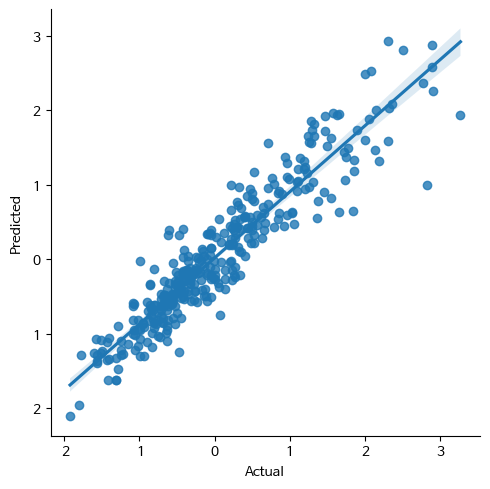

In [43]:
sns.lmplot(x='Actual', y='Predicted', data=output)

### 9.3 모델검정

In [45]:
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
print('RMSE: %.3f' % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2: %.3f' % r2_score(y_test, y_pred))

MSE: 0.120
MAE: 0.260
RMSE: 0.346
R2: 0.873
